In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "beam"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,3448
2021-03,4042


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
              sum      mean        max
repo                                  
beam  2782.366111  0.688364  46.451667

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                         sum      mean        max
repo workflowid                                  
beam 2083803     1310.275833  2.232156  46.451667
     2173354     1109.999167  1.394471   7.466667
     1729654      347.849722  0.545219   1.052500
     1729655       14.241389  0.007047   0.174167

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
488121,apache,beam,549821700,3141,2021-02-09 00:59:15+00:00,2021-02-09 07:03:28+00:00,completed,failure,2083803,2021-02-09 00:59:35+00:00,2021-02-09 07:03:13+00:00,True,26,180058,beam,50.016111,2021-02
488779,apache,beam,647611216,3734,2021-03-12 22:25:29+00:00,2021-03-13 04:01:56+00:00,completed,failure,2083803,2021-03-12 22:25:39+00:00,2021-03-13 04:01:42+00:00,True,26,167226,beam,46.451667,2021-03
488764,apache,beam,645014377,3720,2021-03-12 04:02:16+00:00,2021-03-12 08:01:56+00:00,completed,failure,2083803,2021-03-12 04:32:19+00:00,2021-03-12 08:01:41+00:00,True,26,102804,beam,28.556667,2021-03
488756,apache,beam,644614586,3713,2021-03-12 00:41:42+00:00,2021-03-12 03:58:27+00:00,completed,cancelled,2083803,2021-03-12 00:44:08+00:00,2021-03-12 03:58:10+00:00,True,26,90594,beam,25.165000,2021-03
488116,apache,beam,549415326,3137,2021-02-08 21:54:46+00:00,2021-02-09 01:02:45+00:00,completed,cancelled,2083803,2021-02-08 22:26:36+00:00,2021-02-09 01:02:27+00:00,True,26,65927,beam,18.313056,2021-02
488059,apache,beam,541278687,3086,2021-02-05 18:38:30+00:00,2021-02-06 00:03:32+00:00,completed,failure,2083803,2021-02-05 18:54:57+00:00,2021-02-06 00:03:17+00:00,True,26,51419,beam,14.283056,2021-02
488039,apache,beam,538148910,3068,2021-02-04 19:07:08+00:00,2021-02-04 21:22:51+00:00,completed,failure,2083803,2021-02-04 19:31:59+00:00,2021-02-04 21:22:32+00:00,True,26,38823,beam,10.784167,2021-02
487979,apache,beam,529644857,3013,2021-02-02 03:39:37+00:00,2021-02-02 06:14:19+00:00,completed,failure,2083803,2021-02-02 04:11:42+00:00,2021-02-02 06:14:04+00:00,True,26,37509,beam,10.419167,2021-02
488026,apache,beam,535415053,3056,2021-02-03 23:13:34+00:00,2021-02-04 01:36:46+00:00,completed,failure,2083803,2021-02-03 23:46:54+00:00,2021-02-04 01:36:29+00:00,True,26,37224,beam,10.340000,2021-02
488084,apache,beam,542436517,3108,2021-02-06 05:04:26+00:00,2021-02-06 06:10:59+00:00,completed,failure,2083803,2021-02-06 05:04:37+00:00,2021-02-06 06:10:45+00:00,True,26,36563,beam,10.156389,2021-02


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
18,apache,beam,Java Wordcount Direct Runner (windows-latest),441.193889
8,apache,beam,Java Unit Tests (macos-latest),429.319167
16,apache,beam,Java Wordcount Direct Runner (macos-latest),428.853333
10,apache,beam,Java Unit Tests (windows-latest),410.553611
17,apache,beam,Java Wordcount Direct Runner (ubuntu-latest),332.402222
9,apache,beam,Java Unit Tests (ubuntu-latest),328.975278
3,apache,beam,Build python wheels on ubuntu-latest,282.569722
27,apache,beam,"Python Unit Tests (ubuntu-latest, 3.6, py36)",277.053889
28,apache,beam,"Python Unit Tests (ubuntu-latest, 3.7, py37)",269.586667
21,apache,beam,"Python Unit Tests (macos-latest, 3.6, py36)",268.178611


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
4,apache,beam,success,47118
0,apache,beam,cancelled,8853
3,apache,beam,skipped,8760
1,apache,beam,failure,2160
2,apache,beam,neutral,11


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

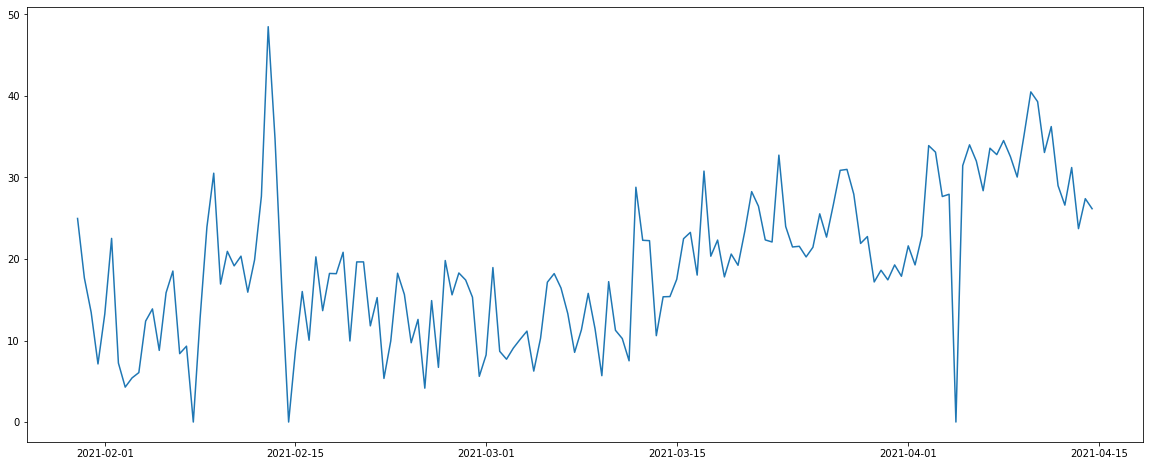

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

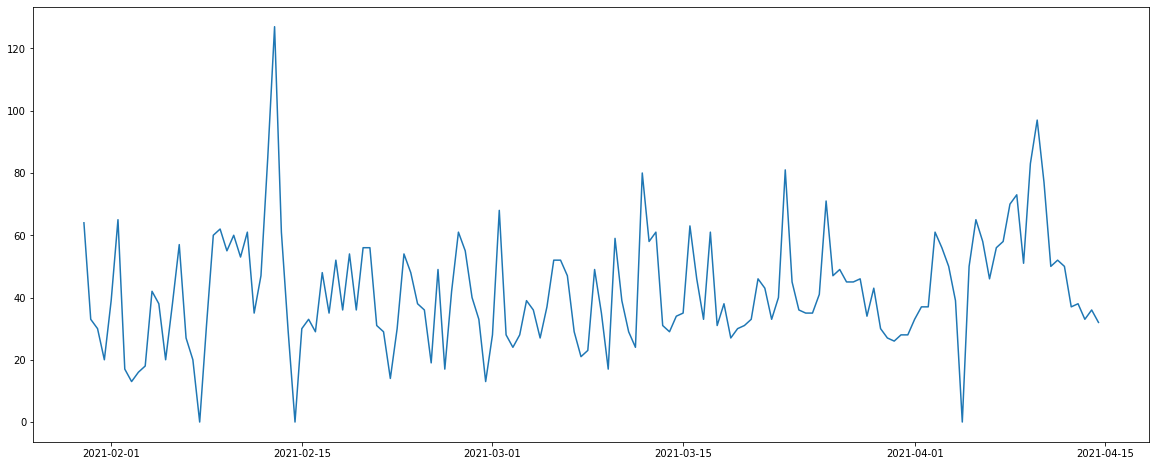

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()